In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [2]:
digits = datasets.load_digits()
type(digits)


sklearn.utils.Bunch

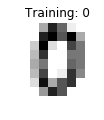

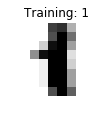

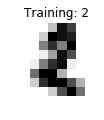

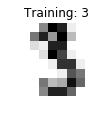

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    plt.show()


In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [5]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
#print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




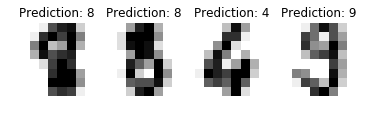

In [7]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [8]:
res = metrics.confusion_matrix(expected, predicted)
res
#type(expected)

array([[87,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 88,  1,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 85,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 79,  0,  3,  0,  4,  5,  0],
       [ 0,  0,  0,  0, 88,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 88,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 88,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 88,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 90]], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

In [10]:
accuracy_score(expected, predicted)

0.9688542825361512

In [12]:
from sklearn.metrics import classification_report
import pandas as pd
h=list(classification_report(expected, predicted))
k=pd.DataFrame(h)
k.values.reshape(2, 319)

array([[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        'p', 'r', 'e', 'c', 'i', 's', 'i', 'o', 'n', ' ', ' ', ' ', ' ',
        'r', 'e', 'c', 'a', 'l', 'l', ' ', ' ', 'f', '1', '-', 's', 'c',
        'o', 'r', 'e', ' ', ' ', ' ', 's', 'u', 'p', 'p', 'o', 'r', 't',
        '\n', '\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        '0', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '1', '.', '0', '0', ' ',
        ' ', ' ', ' ', ' ', ' ', '0', '.', '9', '9', ' ', ' ', ' ', ' ',
        ' ', ' ', '0', '.', '9', '9', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', '8', '8', '\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', '1', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '0', '.', '9', '9',
        ' ', ' ', ' ', ' ', ' ', ' ', '0', '.', '9', '7', ' ', ' ', ' ',
        ' ', ' ', ' ', '0', '.', '9', '8', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', ' ', '9', '1', '\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', ' ', '2', ' ', ' ', ' ', ' ', ' ', ' ',

In [13]:
df1 = pd.DataFrame(expected)
df2 = pd.DataFrame(expected)

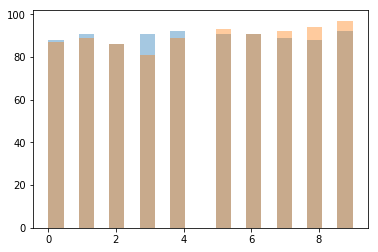

In [14]:
import seaborn as sns
sns.distplot(expected,bins=20,kde=False)
sns.distplot(predicted,bins=20,kde=False)
plt.show()

In [15]:
df1['pred'] = df2[0]

In [16]:
df1.head()

,0,pred
0,8,8
1,8,8
2,4,4
3,9,9
4,0,0


In [17]:
df1_numpy = df1.values

In [18]:
df1_numpy

array([[8, 8],
       [8, 8],
       [4, 4],
       ...,
       [8, 8],
       [9, 9],
       [8, 8]])

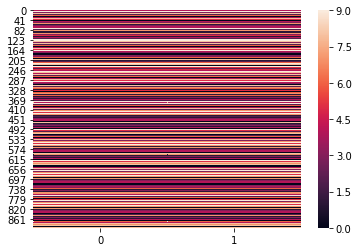

In [19]:

heat_map = sns.heatmap(df1_numpy)
plt.show()

In [20]:
################################compare and then predict an image#######################

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img2 = mpimg.imread('11.JPG')
img2

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [248, 248, 248],
        [255, 255, 255],
        [249, 249, 249]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [244, 244, 244],
        [255, 255, 255],
        [252, 252, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [240, 240, 240],
        [253, 253, 253],
        [254, 254, 254]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [226, 226, 226],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [226, 226, 226],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [226, 226, 226],
        [255, 255, 255]]

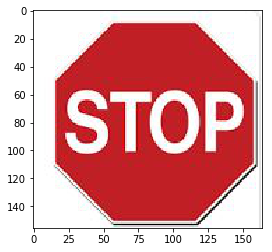

In [26]:
imgplot = plt.imshow(img2)
imgplot
plt.show()

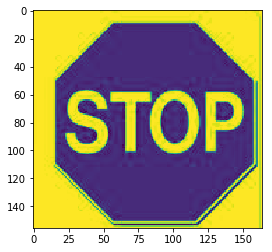

In [29]:
lum_img1 = img2[:, :,1]
plt.imshow(lum_img1)
plt.show()

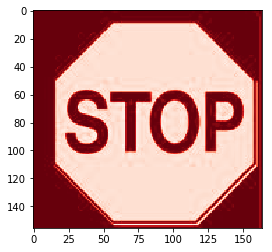

In [30]:
fg2 = plt.imshow(lum_img1, cmap="Reds")
plt.show()

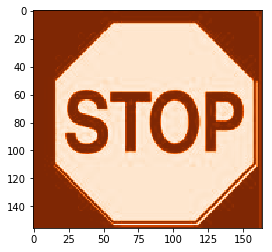

In [31]:
fg2=plt.imshow(lum_img1, cmap="Oranges")
plt.show()

In [33]:
fg = plt.imshow(lum_img1, cmap="Blues")


In [34]:
type(fg)

matplotlib.image.AxesImage

In [35]:
fg1=np.array(fg)

In [36]:
type(fg1)


numpy.ndarray

In [37]:
fg1

array(<matplotlib.image.AxesImage object at 0x000001E7917B20B8>,
      dtype=object)

In [387]:
#####################implementation #############################

In [498]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn.datasets
imug1 = mpimg.imread('100.png')
imug2 = mpimg.imread('20.png')
imug3 = mpimg.imread('100.png')

In [499]:
l1=list(imug1)
type(l1)
l2=list(imug2)
l3=list(imug3)

In [500]:
# Create a dataframe from zipped list
type(l2)

list

In [501]:
import numpy as np
import sklearn.datasets

examples = []
examples.append('some text')
examples.append('another example text')
examples.append('example 3')

target = np.zeros((3,), dtype=np.int64)
target[0] = 0
target[1] = 1
target[2] = 0
dataset = sklearn.datasets.base.Bunch(data=examples, target=target)

In [502]:
dataset

{'data': ['some text', 'another example text', 'example 3'],
 'target': array([0, 1, 0], dtype=int64)}

In [503]:
type(dataset)

sklearn.utils.Bunch

In [504]:
type(examples)

list

In [505]:
import numpy as np
import sklearn.datasets

#examples = []
#examples.append('some text')
#examples.append('another example text')
#examples.append('example 3')

#target = np.zeros((3,), dtype=np.int64)
#target[0] = 0
#target[1] = 1
#target[2] = 0
dl1 = sklearn.datasets.base.Bunch(data=l1)
dl2 = sklearn.datasets.base.Bunch(data=l2)

In [506]:
import numpy as np
import sklearn.datasets
dl2 = sklearn.datasets.base.Bunch(data=l2)

In [507]:
import numpy as np
import sklearn.datasets
dl3 = sklearn.datasets.base.Bunch(data=l3)

In [508]:
from sklearn.linear_model import LinearRegression


In [509]:
linear_regressor = LinearRegression()
imug1.shape
imug2.shape
imug1

#imug1.shape

array([[[0.6       , 0.6039216 , 0.5568628 ],
        [0.654902  , 0.5882353 , 0.49019608],
        [0.8156863 , 0.75686276, 0.654902  ],
        ...,
        [0.5058824 , 0.47058824, 0.43529412],
        [0.47843137, 0.4509804 , 0.41568628],
        [0.43137255, 0.40392157, 0.37254903]],

       [[0.6509804 , 0.654902  , 0.6       ],
        [0.6392157 , 0.6117647 , 0.53333336],
        [0.9137255 , 0.8156863 , 0.6745098 ],
        ...,
        [0.42745098, 0.4       , 0.36862746],
        [0.43529412, 0.4117647 , 0.38039216],
        [0.41568628, 0.39215687, 0.36862746]],

       [[0.64705884, 0.6509804 , 0.6       ],
        [0.627451  , 0.62352943, 0.5686275 ],
        [0.85490197, 0.7647059 , 0.6313726 ],
        ...,
        [0.40784314, 0.38431373, 0.35686275],
        [0.4392157 , 0.41568628, 0.38431373],
        [0.4392157 , 0.4117647 , 0.38431373]],

       ...,

       [[0.34509805, 0.32941177, 0.3019608 ],
        [0.32156864, 0.30588236, 0.27450982],
        [0.32941177, 0

In [510]:
####most important thing image numpy array reshaping########

In [511]:
imug1_new=imug1.transpose(2,0,1).reshape(3,-1)
imug2_new=imug2.transpose(2,0,1).reshape(3,-1)
imug1_new

array([[0.6       , 0.654902  , 0.8156863 , ..., 0.7764706 , 0.78431374,
        0.827451  ],
       [0.6039216 , 0.5882353 , 0.75686276, ..., 0.56078434, 0.5647059 ,
        0.6039216 ],
       [0.5568628 , 0.49019608, 0.654902  , ..., 0.32156864, 0.31764707,
        0.34901962]], dtype=float32)

In [512]:
print(imug1_new.shape)
print(imug2_new.shape)
import pandas as pd

(3, 1024)
(3, 1024)


In [513]:
train=pd.DataFrame(imug1_new)
test=pd.DataFrame(imug2_new)

In [514]:
tf = train.transpose()
tf.head()

,0,1,2
0,0.600000,0.603922,0.556863
1,0.654902,0.588235,0.490196
2,0.815686,0.756863,0.654902
3,0.674510,0.658824,0.596078
4,0.768627,0.741176,0.666667


In [515]:
tt = test.transpose()
tt.head()

,0,1,2
0,0.486275,0.556863,0.462745
1,0.490196,0.556863,0.462745
2,0.482353,0.552941,0.466667
3,0.478431,0.549020,0.462745
4,0.490196,0.552941,0.466667


In [516]:
X_numpy = tf.values
Y_numpy = tt.values

In [517]:
model = linear_regressor.fit(X_numpy, Y_numpy)
Y_pred = linear_regressor.predict(X_numpy) 

In [518]:
Y_pred

array([[0.55792516, 0.6028515 , 0.5774427 ],
       [0.47173387, 0.49684757, 0.45394322],
       [0.5307581 , 0.5827961 , 0.5514275 ],
       ...,
       [0.21138863, 0.23643576, 0.14348565],
       [0.19660902, 0.22709784, 0.1315363 ],
       [0.1971724 , 0.23583454, 0.14050972]], dtype=float32)

In [519]:
Y_pred = pd.DataFrame(Y_pred)

In [520]:
Y_pred.head()

,0,1,2
0,0.557925,0.602852,0.577443
1,0.471734,0.496848,0.453943
2,0.530758,0.582796,0.551427
3,0.556069,0.601957,0.575854
4,0.570765,0.623952,0.600469


In [521]:
model.intercept_

array([0.41120577, 0.3469096 , 0.29203552], dtype=float32)

In [522]:
model.coef_

array([[ 0.6159063 , -2.5909011 ,  2.409708  ],
       [-0.5370674 , -0.12892216,  1.1781021 ],
       [-0.47492653, -0.5147497 ,  1.5824932 ]], dtype=float32)

In [523]:
import sklearn
from sklearn import metrics
test_rmse= np.sqrt(metrics.mean_squared_error(Y_pred,tt))

In [525]:
type(test_rmse)
test_rmse

0.12534226

In [526]:
import scipy.misc
Y_pred.shape
import imageio
import skimage
from skimage import img_as_ubyte
Y_pred2 = Y_pred.values
#imageio.imwrite('picture_out3.jpg', img_as_ubyte(Y_pred2/255.0),cmap='gray')
Y_pred2

array([[0.55792516, 0.6028515 , 0.5774427 ],
       [0.47173387, 0.49684757, 0.45394322],
       [0.5307581 , 0.5827961 , 0.5514275 ],
       ...,
       [0.21138863, 0.23643576, 0.14348565],
       [0.19660902, 0.22709784, 0.1315363 ],
       [0.1971724 , 0.23583454, 0.14050972]], dtype=float32)

In [527]:
test_rmse

##############first finding###############

0.12534226

In [551]:
Y_pred2


array([[0.55792516, 0.6028515 , 0.5774427 ],
       [0.47173387, 0.49684757, 0.45394322],
       [0.5307581 , 0.5827961 , 0.5514275 ],
       ...,
       [0.21138863, 0.23643576, 0.14348565],
       [0.19660902, 0.22709784, 0.1315363 ],
       [0.1971724 , 0.23583454, 0.14050972]], dtype=float32)

In [528]:
Y_numpy


array([[0.4862745 , 0.5568628 , 0.4627451 ],
       [0.49019608, 0.5568628 , 0.4627451 ],
       [0.48235294, 0.5529412 , 0.46666667],
       ...,
       [0.39215687, 0.45490196, 0.4509804 ],
       [0.39607844, 0.45882353, 0.45882353],
       [0.40392157, 0.46666667, 0.4627451 ]], dtype=float32)

In [552]:
Y_pred2.shape

(1024, 3)

In [557]:
cutoff = 0.55
y_pred_classes = np.zeros_like(Y_pred2)
y_pred_classes[Y_pred2 > cutoff] = 1

y_pred_classes
#y_pred_classes.shape

array([[1., 1., 1.],
       [0., 0., 0.],
       [0., 1., 1.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [558]:
y_test_classes = np.zeros_like(Y_pred2)
y_test_classes[Y_numpy > cutoff] = 1

#y_test_classes[:34]
y_test_classes[:16]

y_test_classes_df=pd.DataFrame(y_test_classes)

#y_test_classes_df.head(45)

pattern_count_test = y_test_classes_df[(y_test_classes_df[0]== 0) & (y_test_classes_df[1] == 0) & (y_test_classes_df[2] == 0)].count()

y_test_classes_df.rename(columns = {0:'R', 1:'G',2:'B'}, inplace = True)


print(pattern_count_test)


######count for train dataset######

y_pred_classes_df = pd.DataFrame(y_pred_classes)
pattern_count_train = y_pred_classes_df[(y_pred_classes_df[0]== 0) & (y_pred_classes_df[1] == 0) & (y_pred_classes_df[2] == 0)].count()

#y_test_classes_df.rename(columns = {0:'R', 1:'G',2:'B'}, inplace = True)

len(y_pred_classes_df)



0    140
1    140
2    140
dtype: int64


1024

In [559]:
#############Accuracy calculation############

In [560]:
from sklearn.metrics import accuracy_score


model.score(y_test_classes, y_pred_classes)

-0.12370819371591663

In [561]:
y_pred_classes

array([[1., 1., 1.],
       [0., 0., 0.],
       [0., 1., 1.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [562]:

#plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Confusion matrix, without normalization')

In [563]:
from sklearn.metrics import confusion_matrix


In [564]:
cm = confusion_matrix(y_test_classes.argmax(axis=1), y_pred_classes.argmax(axis=1))

In [565]:
cm

array([[991,   7],
       [ 24,   2]], dtype=int64)

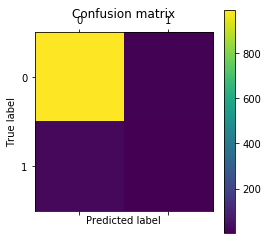

In [577]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [578]:
import os.path
import numpy as np
from PIL import Image

len(y_pred_classes.shape)

#img = Image.fromarray(Y_pred2, 'RGB')
final_image_array = np.resize(Y_pred2,(32,32,3))

img = Image.fromarray(final_image_array, 'RGB')
img.show()

In [579]:
##########Validation Curve for learning ############

In [580]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve

In [581]:
train_scores, valid_scores = validation_curve(Ridge(), y_test_classes, y_pred_classes, "alpha",np.logspace(-7, 3, 3),cv=5)

In [582]:
train_scores

array([[0.49052099, 0.41082007, 0.39937574, 0.44118287, 0.46384058],
       [0.49052098, 0.41082006, 0.39937574, 0.44118285, 0.46384057],
       [0.16588595, 0.12575613, 0.11351225, 0.13650688, 0.15212106]])

In [583]:
valid_scores

array([[0.16214095, 0.55723914, 0.54968261, 0.39319307, 0.25819758],
       [0.16232749, 0.55724817, 0.54967193, 0.3932205 , 0.2582818 ],
       [0.00557743, 0.13662625, 0.10211086, 0.12286245, 0.04319383]])

In [584]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

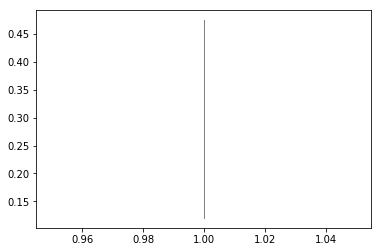

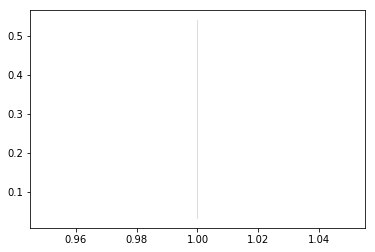

In [585]:
param_range = np.arange(1,3,5)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="gray")
plt.show()
plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, color="gainsboro")
plt.show()

In [586]:
#########R square ##############

In [576]:
from sklearn.metrics import r2_score
r2_score(y_pred_classes,y_test_classes)

0.1771616477510027